# Carrington SunPy

https://docs.sunpy.org/en/stable/generated/gallery/map_transformations/reprojection_carrington.html

https://docs.sunpy.org/en/stable/generated/gallery/map_transformations/reprojection_aia_euvi_mosaic.html

In [28]:
import matplotlib.pyplot as plt

import astropy.units as u
from astropy.coordinates import SkyCoord

import sunpy.map
from sunpy.coordinates import frames

In [29]:
from module import getObstime, readFitsBz2

path = 'data/L1/imoa_06563_l1_20240317_09343547_emi1.fts.bz2'

data = readFitsBz2(path)

obs_time = getObstime(path)

In [30]:
coord = SkyCoord(0*u.arcsec, 0*u.arcsec, obstime=obs_time,
                 observer='earth', frame=frames.Helioprojective)

In [31]:
header = sunpy.map.make_fitswcs_header(data, coord,
                                       reference_pixel=[1024, 1024]*u.pixel,
                                       scale=[1.2, 1.2]*u.arcsec/u.pixel,
                                       wavelength=6563*u.angstrom)

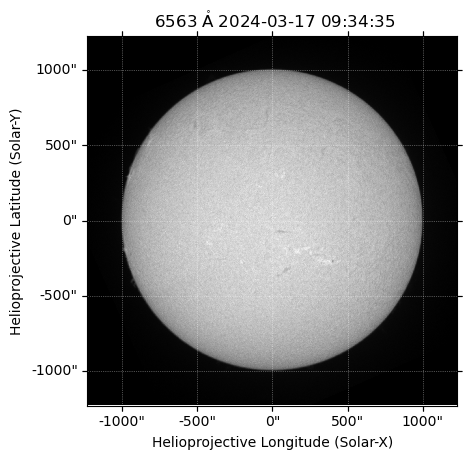

In [32]:
aia_map = sunpy.map.Map(data, header)
fig = plt.figure()
ax = fig.add_subplot(projection=aia_map)
aia_map.plot(axes=ax)
plt.show()

## Carrington

In [33]:
from sunpy.map.header_helper import make_heliographic_header

In [34]:
shape = data.shape
carr_header = make_heliographic_header(aia_map.date, aia_map.observer_coordinate, shape, frame='carrington')

In [35]:
outmap = aia_map.reproject_to(carr_header)

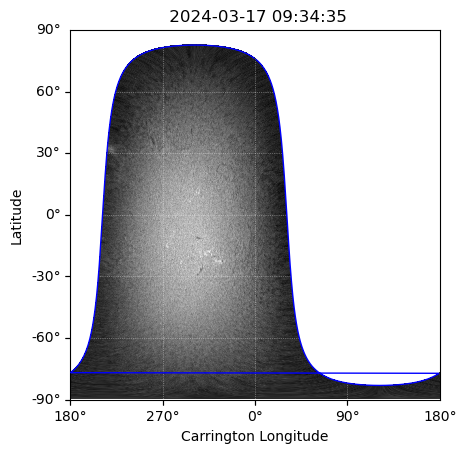

In [36]:
fig = plt.figure()
ax = fig.add_subplot(projection=outmap)
outmap.plot(axes=ax)
outmap.draw_limb(color='blue')

plt.show()